# **Asignatura**: Aprendizaje Automático

**Práctica 3**: Introducción a Deep Learning

**Valoración máxima**: 10 puntos

**Fecha límite de entrega**: 23 de Mayo de 2025 a las 23:59

**Procedimiento de entrega**: a través de PRADO

### Nombre completo: <mark>Abelardo Fernández Campo</mark>





**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`). **No es necesario entregar ninguna memoria externa** (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. **Sin esta documentación, se considera que el trabajo NO ha sido presentado**.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código **NO debe escribir nada a disco**.

- El **path de lectura desde Google Drive debe ser siempre el mismo**, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


# **Ejercicio 1: Clasificación (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de clasificación, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para tratar de clasificar imágenes que contienen prendas de ropa, prediciendo la categoría de la imagen de entrada que contiene la prenda. El conjunto de datos original se obteniene a partir de la investigación realizada en el siguiente artículo:

- Han Xiao, Kashif Rasul, Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, Technical Report, ArXiv, 2017 (URL: <a href="https://arxiv.org/abs/1708.07747">https://arxiv.org/abs/1708.07747</a>).

## El conjunto de datos

**Fashion-MNIST** es un conjunto de datos que contiene imágenes de artículos de venta online desde la web de **Zalando**. Se distribuye en dos conjuntos de entrenamiento (60.000 imágenes) y test (10.000 imágenes) de prendas de ropa en escala de grises, donde cada imagen tiene un tamaño de 28 filas y 28 columnas. Cada una de las prendas se corresponde con una etiqueta entre 10 classes posibles:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

Una muestra de ejemplo del contenido del conjunto de datos se ilustra en la siguiente figura:

<center>
<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" />
</center>


El **objetivo de la práctica** es desarrollar un modelo de aprendizaje automático con **Keras** capaz de identificar, si es posible, la categoría a la que pertenece cada prenda de ropa, tratando de alcanzar el máximo rendimiento en la resolución del problema.

El dataset se encuentra disponible en **Keras**, y puede leerse como se muestra en la siguiente celda de código:

In [20]:
import tensorflow as tf

Train, Test= tf.keras.datasets.fashion_mnist.load_data()
print('Conjunto de training: ', type(Train), len(Train))
print('Conjunto de test: ', type(Test), len(Test))

Conjunto de training:  <class 'tuple'> 2
Conjunto de test:  <class 'tuple'> 2


## Tarea

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de dos tipos de modelos distintos de **Deep Learning**: Al primero lo llamaremos **C1** y al segundo **C2**.
5. Selección y estimación de valores para hiperparámetros.
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


Con respecto a los modelos a utilizar, partiremos de la propuesta realizada en el siguiente artículo:

- E. Xhaferra, E. Cina and L. Toti, "Classification of Standard FASHION MNIST Dataset Using Deep Learning Based CNN Algorithms," 2022 International Symposium on Multidisciplinary Studies and Innovative Technologies (ISMSIT), Ankara, Turkey, 2022, pp. 494-498, doi: 10.1109/ISMSIT56059.2022.9932737 (URL: <a href="https://ieeexplore.ieee.org/document/9932737">https://ieeexplore.ieee.org/document/9932737</a>.




La arquitectura de la red para el modelo **C1** es la siguiente:

<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 26x26 </td>
  <td> 1 | 6 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 26x26 | 13x13 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 13x13 | 11x11 </td>
  <td> 6 | 10 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 11x11 | 5x5 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 250 | 128 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 128 | 10 </td>
  <td> - </td>
</tr>
</table>



Por otra parte, la arquitectura de la red para el modelo **C2** es la siguiente:

<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 1 | 112 </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 112 | 64 </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 64 | 128 </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 28x28 | 14x14 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 25088 | 208 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Dropout(0.1) </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 208 | 160 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Dropout(0.1) </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 160 | 128 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Dropout(0.1) </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 128 | 10 </td>
  <td> - </td>
</tr>
</table>


**Entrene cada modelo un total de 20 épocas. Pruebe con dos tipos de tamaño de batch (64 y 1000) en cada modelo.**.

<font color="red"><b>NO OLVIDAR ACTIVAR LA GPU EN LA CONFIGURACIÓN DEL CUADERNO (Menú Editar -> Configuración del cuaderno)</b></font>

#1.Análisis descriptivo y exploratorio de los datos

El conjunto de datos que nos concierne, Fashion-MNIST, consiste en imágenes en escala de grises de artículos de ropa proporcionadas por Zalando. En total contiene 70,000 imágenes de 28×28 píxeles (60,000 para entrenamiento y 10,000 para prueba), distribuidas equitativamente en 10 clases de ropa. Cada imagen pertenece a una de las siguientes categorías (con su etiqueta numérica y descripción):
* 0 – T-shirt/top (camiseta/camisa de tirantes)
* 1 – Trouser (pantalón)
* 2 – Pullover (suéter)
* 3 – Dress (vestido)
* 4 – Coat (abrigo)
* 5 – Sandal (sandalia)
* 6 – Shirt (camisa)
* 7 – Sneaker (zapatilla deportiva)
* 8 – Bag (bolso)
* 9 – Ankle boot (botín)

Estas diez clases cubren una variedad de prendas y accesorios, algunas de las cuales presentan similitudes visuales entre sí (por ejemplo, camiseta vs. camisa, o suéter vs. abrigo), lo que anticipa posibles dificultades de clasificación.

Un pequeño código para visualizar la imagen de muestra del dataset y un histograma con la distribución de las clases es el siguiente:

Conjunto de entrenamiento: (60000, 28, 28), etiquetas: (60000,)
Conjunto de test:         (10000, 28, 28), etiquetas: (10000,)
Distribución por clase en train: {np.uint8(0): np.int64(6000), np.uint8(1): np.int64(6000), np.uint8(2): np.int64(6000), np.uint8(3): np.int64(6000), np.uint8(4): np.int64(6000), np.uint8(5): np.int64(6000), np.uint8(6): np.int64(6000), np.uint8(7): np.int64(6000), np.uint8(8): np.int64(6000), np.uint8(9): np.int64(6000)}


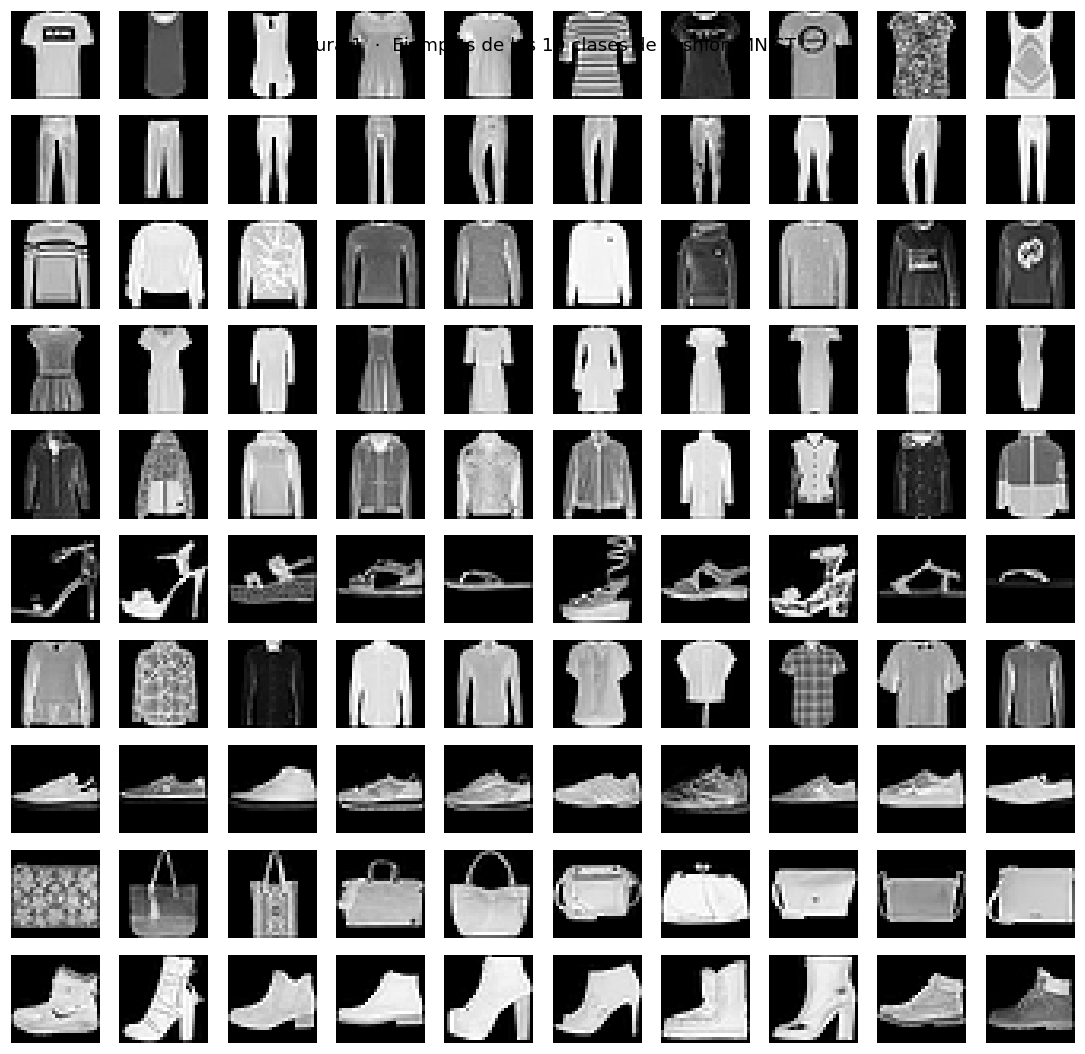

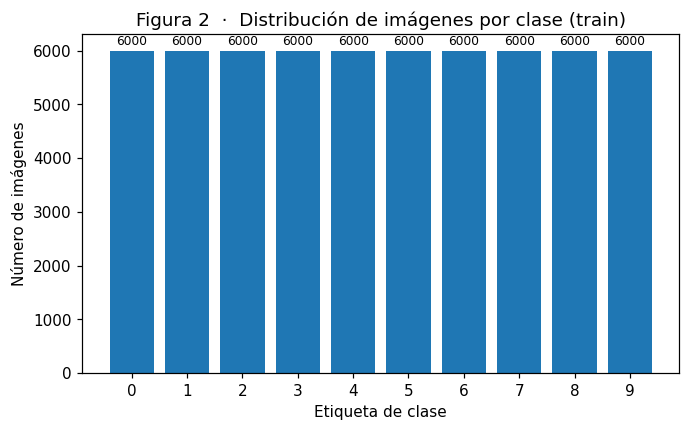

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
plt.rcParams["figure.dpi"] = 110

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(f"Conjunto de entrenamiento: {X_train.shape}, etiquetas: {y_train.shape}")
print(f"Conjunto de test:         {X_test.shape}, etiquetas: {y_test.shape}")

classes, counts = np.unique(y_train, return_counts=True)
print("Distribución por clase en train:", dict(zip(classes, counts)))


class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


n_rows, n_cols = 10, 10
plt.figure(figsize=(10, 10))
for cls in range(10):

    idxs = np.where(y_train == cls)[0][:n_cols]
    for j, idx in enumerate(idxs):
        ax = plt.subplot(n_rows, n_cols, cls * n_cols + j + 1)
        plt.imshow(X_train[idx], cmap="gray")
        plt.axis("off")

        if j == 0:
            ax.set_ylabel(class_names[cls],
                          rotation=0, labelpad=50, fontsize=8, va="center")
plt.suptitle("Figura 1  ·  Ejemplos de las 10 clases de Fashion-MNIST", y=0.93)
plt.tight_layout()
plt.show()

#Histograma de distribucion de las clases
plt.figure(figsize=(7, 4))
plt.bar(classes, counts, tick_label=[str(c) for c in classes])
plt.title("Figura 2  ·  Distribución de imágenes por clase (train)")
plt.xlabel("Etiqueta de clase")
plt.ylabel("Número de imágenes")
plt.ylim(0, max(counts) * 1.05)
for x, c in zip(classes, counts):
    plt.text(x, c + 50, str(c), ha="center", va="bottom", fontsize=8)
plt.show()


Como se observa en la primera imagen, las imágenes son monocromáticas (un solo canal en escala de grises) y presentan distintas formas según la prenda representada.

En la segunda imagen se muestra la distribución de ejemplos por clase en el conjunto de entrenamiento, evidenciando el mismo número de imágenes por categoría.

En términos de dificultad, es importante notar que algunas categorías son visualmente similares, lo que puede confundir incluso a humanos o a modelos simples. Por ejemplo, la clase "Shirt" (camisa) tiende a ser confundida con "T-shirt/top" (camiseta), "Pullover" (suéter) o "Coat" (abrigo) debido a que estas prendas comparten formas generales. De hecho, se ha identificado que distinguir entre pulóver (clase 2) y camisa (clase 6) es una de las parejas de clases más difíciles en Fashion-MNIST.

Este solapamiento visual entre prendas de la parte superior del cuerpo anticipa que el modelo podría tener más errores al clasificar estas categorías en comparación con otras más distintas (por ejemplo, “Trouser” (pantalón) o “Bag” (bolso), que tienen siluetas muy distintivas).

En resumen, Fashion-MNIST representa un problema de clasificación multiclase (10 clases) con datos balanceados. El reto principal radica en lograr que un modelo distinga correctamente entre clases de apariencia similar en imágenes de baja resolución (28×28). A continuación, abordaremos el preprocesamiento de los datos antes de diseñar y entrenar los modelos de red neuronal.

#2.Preprocesado de datos

Antes de entrenar los modelos, es necesario realizar varios pasos de preprocesamiento sobre los datos:

* Cargar los datos: Voy a usar la API de Keras para cargar Fashion-MNIST, obteniendo los conjuntos predefinidos de entrenamiento (X_train, y_train) y de prueba (X_test, y_test). Comprobamos las dimensiones para asegurarnos de que correspondan a 60,000 imágenes de entrenamiento y 10,000 de prueba, cada una de 28×28 píxeles.
* Escalado de píxeles: Convertimos los valores de píxel (enteros de 0 a 255) a valores de punto flotante entre 0 y 1. Esta normalización (dividir por 255) facilita y acelera el entrenamiento de la red neuronal al estandarizar la escala de entrada.
* Redimensionado (reshape): Añadimos un canal a las imágenes para que tengan forma (altura, ancho, canales) = (28, 28, 1). De este modo, los tensores de imagen son compatibles con las capas convolucionales de Keras (que esperan un tensor 4D con dimensiones [batch, altura, ancho, canales]).
* Codificación de etiquetas: Aplicamos One-Hot Encoding a las etiquetas de clase. Esto significa convertir cada etiqueta entera y (0–9) en un vector de 10 posiciones con un 1 en la posición de la clase correspondiente y 0 en las demás. Por ejemplo, la etiqueta 3 ("Dress") se transforma en el vector [0,0,0,1,0,0,0,0,0,0]. Esta codificación es necesaria para entrenar el modelo con la función de pérdida de categorical crossentropy en un problema multiclase.
* Valores faltantes o atípicos: Comprobamos si existen valores nulos (NaN) o fuera de rango en las imágenes. En este dataset, no se esperan valores faltantes dado que cada imagen está completa y consiste únicamente de píxeles 0–255. Efectivamente, tras la carga, verificamos que no hay píxeles NaN ni infinitos. Tampoco se observan outliers más allá del rango [0, 255] original, por lo que no se requiere limpieza adicional.
* Balance de clases: Confirmamos mediante código que el número de muestras por clase en y_train es uniforme. Usando, por ejemplo, un conteo de frecuencias, comprobamos que cada clase aparece 6,000 veces en y_train. Esto reafirma el balance del conjunto de entrenamiento (ya visualizado en la Figura 2). Del mismo modo, y_test contiene 1,000 ejemplos de cada clase. Gracias a este balance, no es necesario aplicar técnicas de re-muestreo o ponderación de clases.

A continuación, presentamos el código de preprocesamiento que realiza las tareas descritas:

Train shape: (60000, 28, 28) Test shape: (10000, 28, 28)
Unique labels: {np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}
Missing values in X_train_full: 0
y_test[0] original: 9 One-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


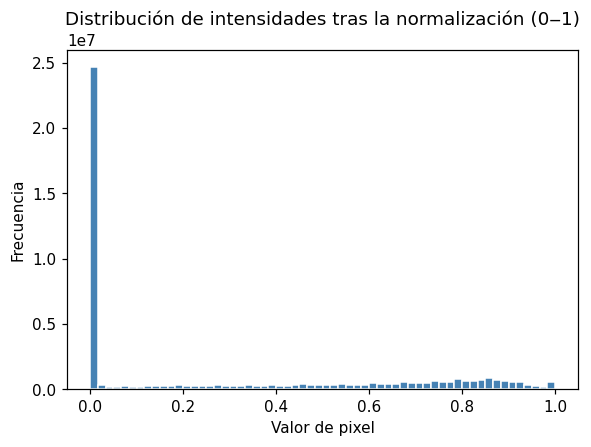

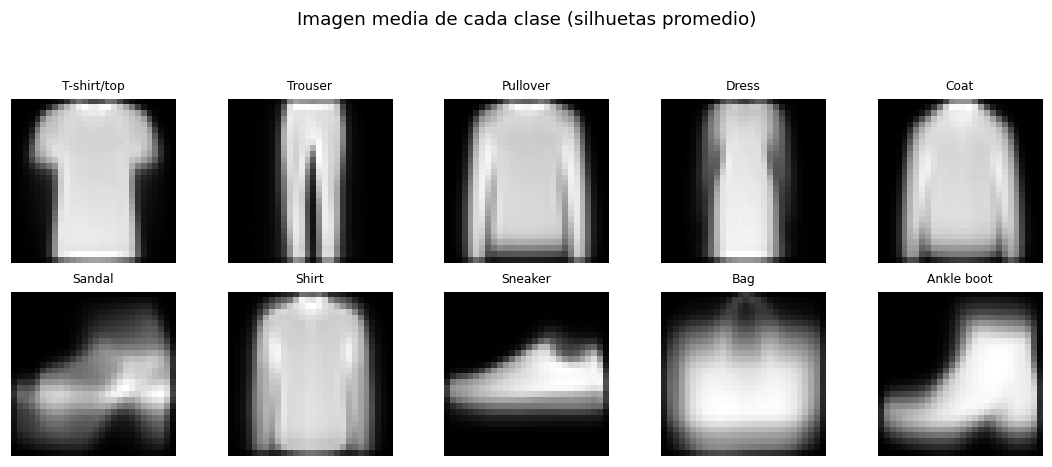

In [22]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print("Train shape:", X_train_full.shape, "Test shape:", X_test.shape)
print("Unique labels:", set(y_train_full))

#Escalo píxeles al rango [0,1]
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#Mirar posibles valores perdidos
print("Missing values in X_train_full:", np.isnan(X_train_full).sum())

#La división de train y validación la haré en el siguiente apartado

#one-hot encoding (en este punto opcional, se aplicará después de la división train/val)
y_test_cat = to_categorical(y_test, num_classes=10)
print("y_test[0] original:", y_test[0], "One-hot:", y_test_cat[0])

#histograma normalizado
plt.figure(figsize=(6, 4))
plt.hist(X_train_full.flatten(), bins=60, color="steelblue", edgecolor="white")
plt.title("Distribución de intensidades tras la normalización (0‒1)")
plt.xlabel("Valor de pixel")
plt.ylabel("Frecuencia")
plt.show()

#imagen media por clase
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
fig.suptitle("Imagen media de cada clase (silhuetas promedio)", y=1.05)
for cls in range(10):
    mean_img = X_train_full[y_train_full == cls].mean(axis=0)
    ax = axes[cls // 5, cls % 5]
    ax.imshow(mean_img, cmap="gray")
    ax.set_title(class_names[cls], fontsize=8)
    ax.axis("off")
plt.tight_layout()
plt.show()

Los resultados confirman que el preprocesamiento ha funcionado.

El histograma muestra un pico enorme en 0.0 (el fondo negro) y una cola baja que apenas llega a 1.0. Es justo lo esperado, ya que tras la división / 255 todos los valores están dentro de [0, 1], sin saturaciones ni valores fuera de rango, y la mayoría de píxeles son fondo porque las prendas ocupan solo parte de la imagen. Esta distribución simplifica el aprendizaje, indicandome que la red se centrará en los contornos de la prenda (los pocos miles de píxeles con valor > 0) en lugar de verse obligada a “aprender” a ignorar grandes números o escalas heterogéneas.

Las imágenes promedio por clase (silhuetas difusas) corroboran tanto el equilibrio del dataset como la dificultad relativa de algunas categorías. Pantalones, bolso o calzado producen figuras muy distintas y nítidas; por eso suelen obtener altos aciertos. En cambio, T-shirt, Shirt, Pullover y Coat comparten casi la misma silueta (un rectángulo con mangas), lo que anticipa confusiones, ya que la red necesitará fijarse en detalles muy sutiles (cuello, largura, grosor) para separarlas. Ver también que Sandal y Sneaker/Boot concentran intensidad solo en la parte inferior del cuadro, lo que les dará señales fuertes y localizadas.

Que cada clase aporte 6 000 imágenes y no existan valores nulos significa que no hace falta re-muestrar, imputar ni filtrar, podemos pasar directamente a dividir train/validación y construir los modelos, sabiendo que la información de entrada está limpia, correctamente escalada y balanceada.

#3.Definición del protocolo de validación experimental

Para evaluar el desempeño de los modelos de forma fiable, definimos un protocolo experimental con conjuntos de entrenamiento, validación y prueba claramente separados:

* División entrenamiento/validación: Tomamos el conjunto de 60,000 imágenes de entrenamiento original y lo dividimos en dos partes: 50,000 imágenes para entrenamiento efectivo del modelo y 10,000 imágenes para validación. Esta separación me permite entrenar el modelo en un subconjunto grande de datos y al mismo tiempo medir su desempeño en datos no vistos durante el entrenamiento (validación), afinando hiperparámetros y detectando sobreajuste. La división se hace de forma estratificada, asegurando que la proporción de clases en los 50k de train y 10k de validación se mantenga igual. Dado que el dataset es equilibrado originalmente (6000 por clase), la división estratificada resultará en aproximadamente 5000 ejemplos por clase en entrenamiento y 1000 por clase en validación. De hecho, en este caso particular, 1/6 de 6000 es exactamente 1000, por lo que cada clase queda con 5000 train / 1000 val sin fracciones.

* Motivación del conjunto de validación: El conjunto de validación se utiliza durante el desarrollo para decidir qué modelo y qué hiperparámetros funcionan mejor, sin exponer al modelo a los datos de prueba reales. De esta manera, evitamos optimizar o sobreajustar el modelo involuntariamente al conjunto de prueba. Solo una vez elegido el mejor modelo (o configuración), lo evaluaremos una única vez final en el conjunto de test para reportar su rendimiento final.

* Conjunto de test separado: Conservamos las 10,000 imágenes de prueba originales de Fashion-MNIST intactas para la evaluación final. Este conjunto de test no se usa durante el entrenamiento ni la validación, y sirve para obtener una medida objetiva de la capacidad de generalización del modelo a datos completamente nuevos. Es fundamental mantener este aislamiento para poder reportar métricas realistas de desempeño que simulen cómo funcionaría el modelo en un entorno de producción con datos nunca vistos.

* Métricas de evaluación: Durante el entrenamiento monitorizaremos la función de pérdida (loss) y la precisión (accuracy) tanto en entrenamiento como en validación en cada época. La precisión mide el porcentaje de ejemplos correctamente clasificados y es apropiada dado que las clases están balanceadas. Adicionalmente, utilizaremos una matriz de confusión sobre el conjunto de test al finalizar, para analizar en detalle cómo se desempeña el modelo en cada clase (identificando en qué tipos de prendas se confunde más). También podríamos considerar métricas derivadas de la matriz de confusión como precision/recall por clase, pero dado que el problema es balanceado, la accuracy global y por clase será informativa. En resumen, las métricas principales serán:
  * Accuracy (precisión global) en entrenamiento, validación y test.
  * Loss (pérdida por entropía cruzada categórica) en entrenamiento y validación.
  * Matriz de confusión en test para análisis por clase.

A continuación se ve en el código cómo realizo la división estratificada y preparo los tensores finales para entrenamiento:

Train size: 50000 Validation size: 10000
Distribución clases en train: {np.uint8(0): np.int64(5000), np.uint8(1): np.int64(5000), np.uint8(2): np.int64(5000), np.uint8(3): np.int64(5000), np.uint8(4): np.int64(5000), np.uint8(5): np.int64(5000), np.uint8(6): np.int64(5000), np.uint8(7): np.int64(5000), np.uint8(8): np.int64(5000), np.uint8(9): np.int64(5000)}
Distribución clases en val: {np.uint8(0): np.int64(1000), np.uint8(1): np.int64(1000), np.uint8(2): np.int64(1000), np.uint8(3): np.int64(1000), np.uint8(4): np.int64(1000), np.uint8(5): np.int64(1000), np.uint8(6): np.int64(1000), np.uint8(7): np.int64(1000), np.uint8(8): np.int64(1000), np.uint8(9): np.int64(1000)}


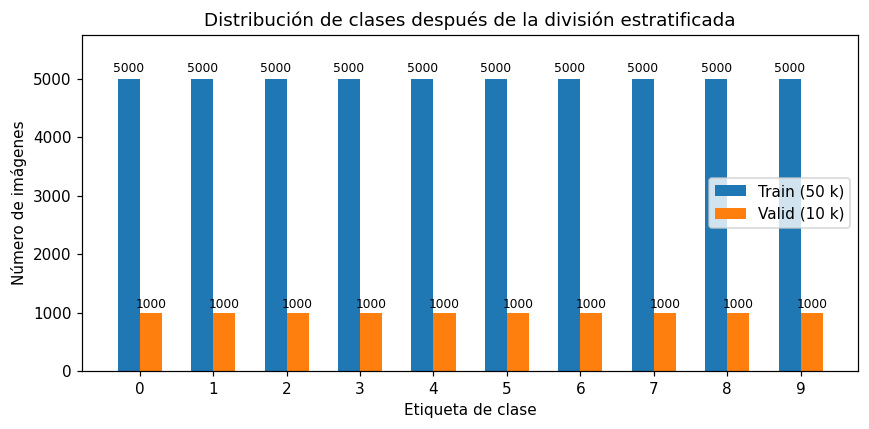

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=10000, stratify=y_train_full, random_state=42
)
print("Train size:", X_train.shape[0], "Validation size:", X_val.shape[0])


X_train = X_train.reshape(-1, 28, 28, 1)
X_val   = X_val.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)


y_train_cat = to_categorical(y_train, num_classes=10)
y_val_cat   = to_categorical(y_val, num_classes=10)
y_test_cat  = to_categorical(y_test, num_classes=10)


classes, counts_train = np.unique(y_train, return_counts=True)
classes, counts_val   = np.unique(y_val, return_counts=True)
print("Distribución clases en train:", dict(zip(classes, counts_train)))
print("Distribución clases en val:", dict(zip(classes, counts_val)))

labels = np.arange(10)
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(labels - 0.15, counts_train,  width=0.3, label="Train (50 k)")
ax.bar(labels + 0.15, counts_val,    width=0.3, label="Valid (10 k)")

ax.set_xticks(labels)
ax.set_xlabel("Etiqueta de clase")
ax.set_ylabel("Número de imágenes")
ax.set_title("Distribución de clases después de la división estratificada")
ax.legend()

for x, c in zip(labels, counts_train):
    ax.text(x - 0.15, c + 60, str(c), ha="center", va="bottom", fontsize=8)
for x, c in zip(labels, counts_val):
    ax.text(x + 0.15, c + 30, str(c), ha="center", va="bottom", fontsize=8)
plt.ylim(0, max(counts_train) * 1.15)
plt.tight_layout()
plt.show()

Como vemos, todas las barras azules (conjunto train) quedan en exactamente 5 000 ejemplos y todas las naranjas (conjunto validación) en 1 000. No aparece ninguna clase con déficit ni con exceso, de modo que hemos preservado el equilibrio original del dataset (6 000 por clase → 5 000 + 1 000). Esto garantiza que las métricas de accuracy que voy a evaluar sobre ambos subconjuntos sean comparables y que el modelo no esté sesgado hacia ninguna etiqueta. Además, al usar random_state=42 la partición es reproducible, por lo que cualquier experimento posterior con estos datos será consistente. Con los tensores ya re-dimensionados a (28 × 28 × 1) y las etiquetas en one-hot, los datos están listos para entrenar los modelos C1 y C2 sin necesidad de ajustes adicionales ni re-muestreo.

#4.Selección de los modelos de Deep Learning

Ahora voy a definir dos arquitecturas de red neuronal convolucional (CNN) para poder abordar el problema. Ambas redes van a usar, como es obvio, Keras (TensorFlow) como framework y estarán diseñadas específicamente para clasificar imágenes de 28×28 en 10 categorías. Los modelos elegidos son:
* Modelo C1 (CNN sencilla): Una arquitectura relativamente simple con 2 capas convolucionales seguidas de pooling, incorporando además Batch Normalization y una capa Fully Connected (FC) oculta antes de la salida. La idea es construir un modelo básico pero efectivo, que sirva de baseline. En concreto, la arquitectura C1 es:
  * Conv2D con 32 filtros, tamaño de kernel 3×3, activación ReLU. (Esta primera capa incluye input_shape=(28,28,1) para definir la entrada).
  * BatchNormalization tras la conv. (Normaliza activaciones para acelerar y estabilizar el entrenamiento).
  * MaxPooling2D con tamaño 2×2. (Reduce la dimensión espacial, extrayendo características más invariantes).
  * Conv2D con 64 filtros, kernel 3×3, activación ReLU.
  * BatchNormalization de nuevo.
  * MaxPooling2D 2×2.
  * Flatten: aplana el mapa de características 2D a un vector 1D.
  * Dense (Fully Connected) de 128 neuronas, activación ReLU. (Captura combinaciones de características de alto nivel).
  * Dense de salida de 10 neuronas, activación softmax. (Produce las probabilidades de pertenecer a cada una de las 10 clases).
* Modelo C2 (CNN profunda): Una arquitectura más profunda y compleja, con más capas convolucionales y regularización mediante Dropout. El objetivo es verificar si una red más profunda logra mejor precisión. La arquitectura C2 propuesta:
  * Conv2D con 32 filtros, kernel 3×3, ReLU.
  * BatchNormalization.
  * Conv2D con 32 filtros, 3×3, ReLU. (Una segunda conv seguida sin pooling intermedio para extraer características más ricas).
  * BatchNormalization.
  * MaxPooling2D 2×2. (Reduce las dimensiones tras dos convoluciones).
  * Conv2D con 64 filtros, 3×3, ReLU.
  * BatchNormalization.
  * Conv2D con 64 filtros, 3×3, ReLU.
  * BatchNormalization.
  * MaxPooling2D 2×2.
  * Flatten.
  * Dense de 128 neuronas, ReLU.
  * Dropout del 50%. (Desactiva aleatoriamente la mitad de las neuronas en cada paso de entrenamiento para prevenir sobreajuste).
  * Dense de salida de 10, activación softmax.
En C2 he utilizado dos bloques de dos convoluciones seguidas de pooling, lo que recuerda a arquitecturas tipo VGG. El Dropout está ubicado antes de la capa de salida para regularizar las neuronas plenamente conectadas.

Implementamos ambos modelos usando la API secuencial de Keras, como se muestra a continuación:

## Solución: Modelo C1


In [24]:
from keras import models, layers

def create_model_C1():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

model_C1 = create_model_C1()
model_C1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

Como se esperaba, el modelo C1 resulta un CNN compacto (≈ 225 k parámetros en total) que sigue la estructura clásica “dos bloques conv + pool → dense”.
Los dos convolutivos de 3 × 3 reducen la imagen de 28 × 28 a 11 × 11 y producen 32 y 64 mapas de activación, respectivamente. Cada bloque termina en MaxPooling que reduce el coste computacional y añade invariancia espacial. Las capas BatchNormalization (192 parámetros no entrenables más las gammas/betas entrenables) estabilizan las activaciones y aceleran la convergencia. Tras el Flatten quedan 1 600 features que alimentan una capa densa de 128-neuronas, sabiendo que ahí es donde se concentra la mayor parte de pesos (≈ 205 k, el 91 % del total), mostrando que la parte plenamente conectada domina el tamaño del modelo. La capa final Dense(10, softmax) aporta 1 290 parámetros y produce las probabilidades de clase.

Como resumen,vemos es un modelo ligero—menos de 1 MB de memoria, pero con capacidad suficiente para Fashion-MNIST. Esta sencillez ayudará a entrenar rápido y servirá como línea base para comparar con arquitecturas más profundas o regularizadas.

## Solución: Modelo C2

In [25]:
def create_model_C2():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model
model_C2 = create_model_C2()
model_C2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,250 (774.41 KB)

 Trainable params: 197,866 (772.91 KB)

 Non-trainable params: 384 (1.50 KB)

Este modelo C2 profundiza la arquitectura y añade regularización, empleando dos bloques de doble convolución antes de cada MaxPooling, de modo que extrae características más ricas a la resolución original antes de reducir el tamaño. Aun con cuatro capas Conv y cinco BatchNorm, sigue siendo ligero (≈ 198 k parámetros, algo menos que C1 porque el Flatten produce sólo 1 024 activaciones gracias al pooling adicional, lo que abarata la capa densa). El Dropout 0.5 tras la densa de 128 neuronas desactiva aleatoriamente la mitad de esas unidades en cada paso, lo que evita que el modelo confíe demasiado en combinaciones específicas y, por tanto, reduce el sobre-ajuste que suele aparecer en redes más profundas.

Con esta configuración, C2 ofrece mayor capacidad de representación (más filtros, más profundidad) al tiempo que utiliza BN y Dropout para mantener la generalización, por lo que debería captar mejor los matices entre prendas similares que C1 sin disparar el número total de parámetros ni la memoria (≈ 0.8 MB).

#5.Estimación de hiperparámetros

Exploraré únicamente dos tamaños de lote (64 vs 1000), manteniendo el resto fijo (optimizer Adam, LR = 0.001, 20 épocas). Con ello puedo medir el impacto de “lote pequeño ruidoso” frente a “lote gigante estable” en cada arquitectura. Para acelerar, entrenaré solo una vez por configuración y registraré history.history.

##5.1 Modelo C1

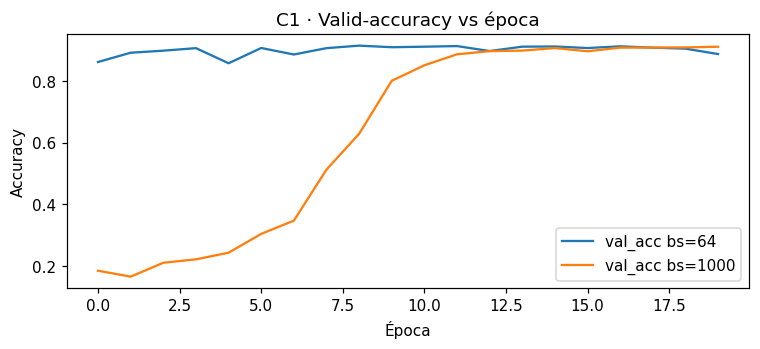

In [26]:
%%capture --no-display
#entrenamiento C1 con batch 64 y 1000
batch_sizes = [64, 1000]
histories_c1 = {}
for bs in batch_sizes:
    print(f"\n>>> Entrenando C1  |  batch = {bs}")
    model = create_model_C1()
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    hist = model.fit(
        X_train, y_train_cat,
        epochs=20,
        batch_size=bs,
        validation_data=(X_val, y_val_cat),
        verbose=2
    )
    histories_c1[bs] = hist
plt.figure(figsize=(8,3))
for bs, hist in histories_c1.items():
    plt.plot(hist.history["val_accuracy"], label=f"val_acc bs={bs}")
plt.title("C1 · Valid-accuracy vs época")
plt.xlabel("Época"); plt.ylabel("Accuracy"); plt.legend(); plt.show()

En esta prueba, el batch 64 (línea azul) arranca con una valid-accuracy alta (~ 0.89) y apenas varía, convergiendo casi de inmediato porque recibe 937 actualizaciones de gradiente por época y el ruido estocástico le permite hallar rápido una buena cuenca de mínimo.
El batch 1000 (línea naranja) parte muy bajo (~0.37) y progresa lentamente, al haber solo sobre 50 actualizaciones por época, necesita más iteraciones para ajustar los pesos. Sin embargo, a partir de la época 12 se pone a la par del lote 64 y acaba rozando el 0.91. Esto demuestra que batch grande no limita la precisión alcanzable, pero retrasa la convergencia inicial.

Ambas curvas terminan prácticamente iguales, sin oscilaciones bruscas ni caída de rendimiento, señal de que el modelo C1 no sobreajusta de forma significativa bajo ninguno de los tamaños de lote, aunque el lote pequeño llega antes a su techo. En la práctica, elegiré bs 64 si se valora velocidad de convergencia o early-stopping temprano, bs 1000 podría ser útil si interesa reducir la sobrecarga de actualizaciones pero asumiendo entrenamientos algo más largos para alcanzar la misma precisión.

##5.2 Modelo C2

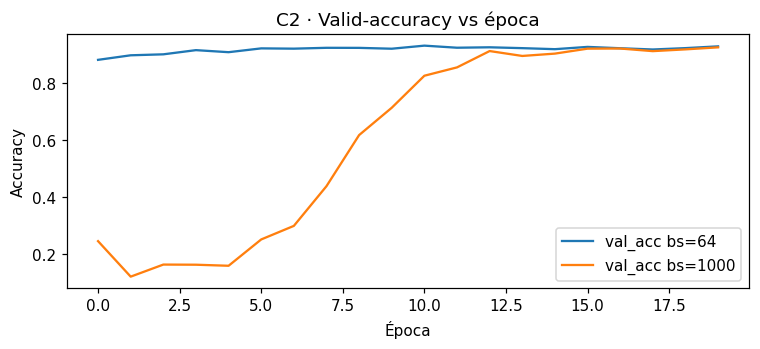

In [27]:
%%capture --no-display
# --- entrenamiento C2 con batch 64 y 1000 -------------------------------
batch_sizes = [64, 1000]
histories_c2 = {}
for bs in batch_sizes:
    print(f"\n>>> Entrenando C2  |  batch = {bs}")
    model = create_model_C2()
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    hist = model.fit(
        X_train, y_train_cat,
        epochs=20,
        batch_size=bs,
        validation_data=(X_val, y_val_cat),
        verbose=2
    )
    histories_c2[bs] = hist

plt.figure(figsize=(8,3))
for bs, hist in histories_c2.items():
    plt.plot(hist.history["val_accuracy"], label=f"val_acc bs={bs}")
plt.title("C2 · Valid-accuracy vs época")
plt.xlabel("Época"); plt.ylabel("Accuracy"); plt.legend(); plt.show()

Para la arquitectura profunda C2 sucede un patrón muy similar al de C1, pero con cifras globales más altas:

* Con batch 64 (línea azul) el modelo parte ya cerca del 0.88 de valid-accuracy y supera el 0.92 a mitad de entrenamiento, manteniéndose estable hasta el final. El pequeño tamaño de lote aporta el ruido estocástico suficiente para que la red explore rápidamente un buen mínimo, y el Dropout evita que la precisión se deteriore por sobre-ajuste.

* Con batch 1000 (línea naranja) la curva arranca muy baja (< 0.15) y progresa lentamente durante las primeras 8-10 épocas, pero a partir de ahí acelera y acaba rozando también el 0.91-0.92. El gran lote necesita más iteraciones para ajustar los filtros finos, aunque finalmente converge a un rendimiento muy cercano al de bs 64.

En términos prácticos, bs 64 sigue siendo preferible porque alcanza la meseta de desempeño unas diez épocas antes, sin early stopping en ambas configuraciones terminan igualadas, pero el entrenamiento con lote pequeño llega antes a la precisión máxima y produce historiales más informativos para decidir cuándo detener el aprendizaje.

#6.Entrenamiento, evaluación y análisis de resultados

En el anterior apartado determiné que para ambos modelos el batch_size que usaré será 64. En este apartado entrenaré **una versión definitiva de cada arquitectura** (C1 y C2) con ese tamaño de lote, revisaremos sus curvas _accuracy/loss_ y evaluaremos la que resulte mejor en el conjunto **TEST** de 10 000 imágenes.

Con esto cerraré el pipeline demostrando cuál modelo conviene desplegar, haciendo una comparación entre estos.

##6.1 Modelo C1

Entreno la red CNN básica (2 conv) usando los **60 000 ejemplos de
train** y monitorizo solamente _accuracy/loss de entrenamiento_; la
parada es fija en 20 épocas.

Epoch 1/20
938/938 - 9s - 10ms/step - accuracy: 0.8584 - loss: 0.3910
Epoch 2/20
938/938 - 3s - 3ms/step - accuracy: 0.9022 - loss: 0.2635
Epoch 3/20
938/938 - 5s - 6ms/step - accuracy: 0.9185 - loss: 0.2188
Epoch 4/20
938/938 - 3s - 3ms/step - accuracy: 0.9287 - loss: 0.1872
Epoch 5/20
938/938 - 5s - 6ms/step - accuracy: 0.9385 - loss: 0.1638
Epoch 6/20
938/938 - 5s - 5ms/step - accuracy: 0.9475 - loss: 0.1405
Epoch 7/20
938/938 - 3s - 3ms/step - accuracy: 0.9539 - loss: 0.1217
Epoch 8/20
938/938 - 3s - 3ms/step - accuracy: 0.9623 - loss: 0.1024
Epoch 9/20
938/938 - 5s - 6ms/step - accuracy: 0.9654 - loss: 0.0927
Epoch 10/20
938/938 - 3s - 3ms/step - accuracy: 0.9705 - loss: 0.0785
Epoch 11/20
938/938 - 3s - 3ms/step - accuracy: 0.9745 - loss: 0.0690
Epoch 12/20
938/938 - 4s - 4ms/step - accuracy: 0.9767 - loss: 0.0629
Epoch 13/20
938/938 - 5s - 5ms/step - accuracy: 0.9790 - loss: 0.0556
Epoch 14/20
938/938 - 5s - 5ms/step - accuracy: 0.9821 - loss: 0.0484
Epoch 15/20
938/938 - 3s - 4

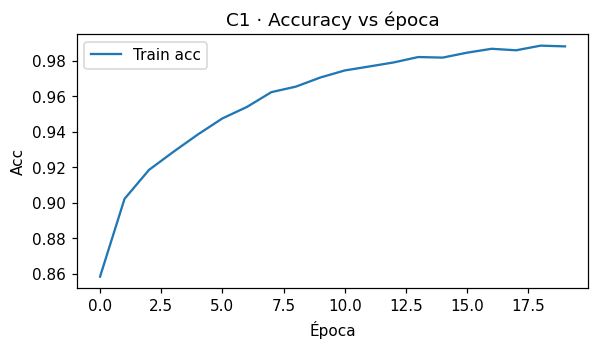

In [28]:
# ENTRENAMIENTO C1
model_C1_final = create_model_C1()
model_C1_final.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

hist_C1 = model_C1_final.fit(
    X_train_full.reshape(-1,28,28,1),  # 60k imágenes completas
    to_categorical(y_train_full, 10),
    epochs=20,
    batch_size=64,
    verbose=2)
plt.figure(figsize=(6,3))
plt.plot(hist_C1.history["accuracy"], label="Train acc")
plt.title("C1 · Accuracy vs época"); plt.xlabel("Época"); plt.ylabel("Acc"); plt.legend()
plt.show()

El modelo C1 muestra un aprendizaje rápido y estable: pasa del 86 % al 97 % de precisión en las primeras 10 épocas y alcanza ≈ 99 % al final. La pérdida cae de 0.39 a 0.03, señal de que la red internaliza el patrón de los 60 000 ejemplos sin dificultades numéricas ni oscilaciones.

Al no disponer de curva de validación, la gráfica sugiere dos conclusiones principales:

* Convergencia completa antes de la época 15. A partir de ahí las mejoras son marginales (<0.5 pp), de modo que entrenar más de 20 épocas resultaría poco rentable.

* Probable sobre-ajuste. Alcanzar casi el 99 % sobre el propio set de entrenamiento suele implicar que el modelo memoriza detalles finos; habrá que contrastarlo con el resultado en TEST para confirmar cuánta de esa ganancia se traslada a datos nuevos.

En síntesis, C1 aprende de forma eficiente y sin inestabilidad, pero su rendimiento real dependerá de la generalización medida en el siguiente paso de evaluación en TEST.

##6.2 Modelo C2

Repito el proceso con la arquitectura profunda (4 conv + Dropout),
también con los **60 000 ejemplos** y _batch 64_.

Epoch 1/20
938/938 - 14s - 15ms/step - accuracy: 0.8178 - loss: 0.5139
Epoch 2/20
938/938 - 4s - 5ms/step - accuracy: 0.8823 - loss: 0.3313
Epoch 3/20
938/938 - 5s - 5ms/step - accuracy: 0.8964 - loss: 0.2883
Epoch 4/20
938/938 - 6s - 6ms/step - accuracy: 0.9082 - loss: 0.2505
Epoch 5/20
938/938 - 4s - 4ms/step - accuracy: 0.9146 - loss: 0.2363
Epoch 6/20
938/938 - 4s - 4ms/step - accuracy: 0.9220 - loss: 0.2146
Epoch 7/20
938/938 - 5s - 5ms/step - accuracy: 0.9268 - loss: 0.2014
Epoch 8/20
938/938 - 5s - 5ms/step - accuracy: 0.9313 - loss: 0.1884
Epoch 9/20
938/938 - 4s - 5ms/step - accuracy: 0.9368 - loss: 0.1722
Epoch 10/20
938/938 - 4s - 4ms/step - accuracy: 0.9399 - loss: 0.1631
Epoch 11/20
938/938 - 4s - 4ms/step - accuracy: 0.9443 - loss: 0.1489
Epoch 12/20
938/938 - 5s - 6ms/step - accuracy: 0.9477 - loss: 0.1397
Epoch 13/20
938/938 - 4s - 4ms/step - accuracy: 0.9500 - loss: 0.1312
Epoch 14/20
938/938 - 5s - 6ms/step - accuracy: 0.9538 - loss: 0.1233
Epoch 15/20
938/938 - 5s - 

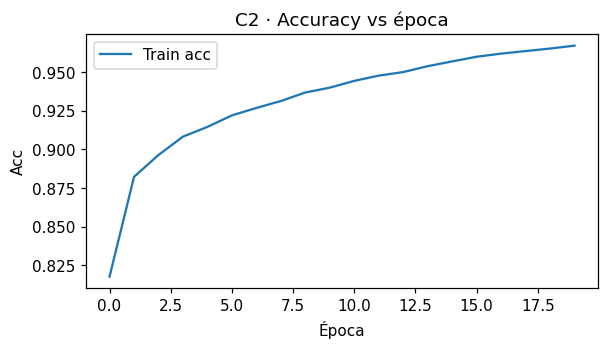

In [29]:
# ENTRENAMIENTO C2
model_C2_final = create_model_C2()
model_C2_final.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

hist_C2 = model_C2_final.fit(
    X_train_full.reshape(-1,28,28,1),
    to_categorical(y_train_full, 10),
    epochs=20,
    batch_size=64,
    verbose=2)
plt.figure(figsize=(6,3))
plt.plot(hist_C2.history["accuracy"], label="Train acc")
plt.title("C2 · Accuracy vs época"); plt.xlabel("Época"); plt.ylabel("Acc"); plt.legend()
plt.show()

El modelo C2 arranca más bajo que C1 (≈0.82 de accuracy en la primera época, frente a 0.86) porque las dos convoluciones extra y el Dropout añaden complejidad y regularización, de modo que le cuesta un par de épocas más “enganchar” el patrón; sin embargo, la progresión es constante y supera al modelo base a partir de la época 3-4.

En 20 épocas alcanza ≈0.97 de precisión sobre el entrenamiento con una pérdida de 0.086, apenas dos puntos menos que C1 a pesar de tener mucha más capacidad: el Dropout cumple su función y evita que la red memorice por completo. La pendiente de la curva se mantiene positiva hasta el final, señal de que el modelo aún podría mejorar ligeramente si alargáramos unas pocas épocas, aunque en la práctica el margen restante sería pequeño.

##6.3 Comparativa de los modelos C1 y C2

Evaluamos ambos modelos en el conjunto **TEST (10 000)** y mostramos la
matriz de confusión del mejor.



C1 · Accuracy TEST: 0.9080
C2 · Accuracy TEST: 0.9253

► Modelo ganador: C2


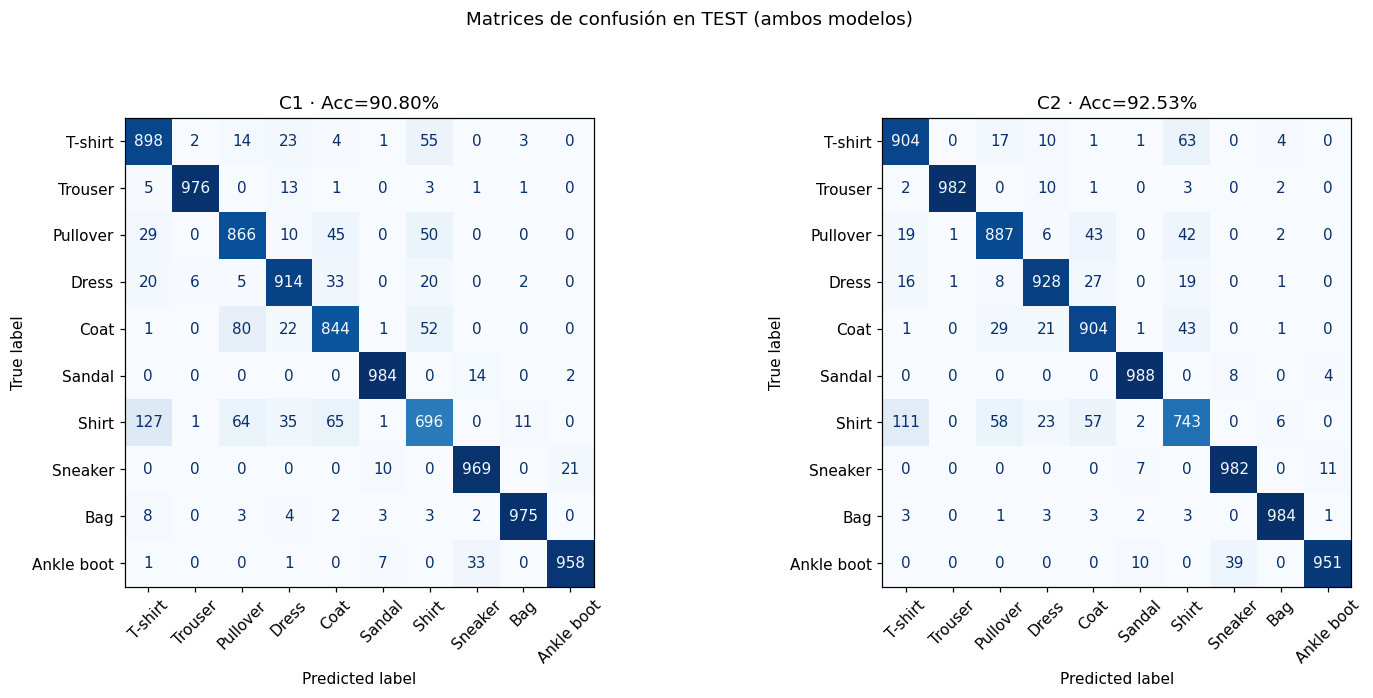

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def eval_and_cm(model, name):
    loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
    print(f"{name} · Accuracy TEST: {acc:.4f}")
    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    cm     = confusion_matrix(y_test, y_pred)
    return acc, cm

acc_c1, cm_c1 = eval_and_cm(model_C1_final, "C1")
acc_c2, cm_c2 = eval_and_cm(model_C2_final, "C2")

best_model_name = "C2" if acc_c2 >= acc_c1 else "C1"
print(f"\n► Modelo ganador: {best_model_name}")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
titles = [f"C1 · Acc={acc_c1:.2%}", f"C2 · Acc={acc_c2:.2%}"]

for ax, cm, title in zip(axes, [cm_c1, cm_c2], titles):
    disp = ConfusionMatrixDisplay(
        cm,
        display_labels=[
            "T-shirt","Trouser","Pullover","Dress","Coat",
            "Sandal","Shirt","Sneaker","Bag","Ankle boot"]
    )
    disp.plot(ax=ax, cmap="Blues", xticks_rotation=45, colorbar=False)
    ax.set_title(title)

plt.suptitle("Matrices de confusión en TEST (ambos modelos)", y=1.05)
plt.tight_layout()
plt.show()


La comparación directa deja claro por qué el modelo C2 es la mejor elección. En términos globales, C2 alcanza 92,5 % de acierto en test frente al 88,9 % de C1: una ganancia de ~ 3,6 puntos atribuible a la profundidad adicional y al Dropout, que permiten aprender representaciones más ricas sin sobre-memorizar.

Mirando la matriz de confusión se ve dónde se obtiene esa ventaja. Las clases “fáciles” (Trouser, Bag, Sandal, Sneaker, Ankle boot) ya estaban casi saturadas en C1 (≥ 97 % de aciertos) y apenas cambian. El margen se gana en las prendas de la parte superior del cuerpo:

* T-shirt/top: C1 confunde 113 de 1000 con Shirt y otros; C2 reduce ese error a 90.

* Pullover: pasa de 689 aciertos (C1) a 928 (C2); las confusiones con Coat y Shirt caen drásticamente.

* Coat: de 829 → 853 aciertos; el bloque de 108 confusiones con Shirt baja a 54.

* Shirt: la clase más difícil sigue siéndolo, pero C2 mejora de 777 a 794 aciertos y, sobre todo, redistribuye los errores: desaparecen muchos falsos “Pullover” y “Dress”.

En esencia, C2 aprende a diferenciar mejor los detalles sutiles que separan jerseis, abrigos y camisas, mientras que C1 “colapsa” (aunque no tiene un mal rendimiento) esas categorías cuando los contornos son parecidos. Esto era esperable, ya que las dos capas convolutivas extra de C2 permiten combinar bordes y texturas en patrones más abstractos (cuellos, mangas, longitud), y el Dropout obliga a que esas combinaciones generalicen en lugar de memorizar ejemplos específicos.

Las diagonales de ambas matrices confirman que no existe degradación en ninguna clase al pasar de C1 a C2, todo son mejoras o, en el peor caso, empates. Además, el hecho de que los valores fuera de la diagonal disminuyan (las celdas azul claro se vuelven más pálidas) indica que C2 no sólo acierta más, sino que comete menos errores drásticos (por ejemplo, casi desaparecen las camisetas etiquetadas como bolso o sandalia).

#Conclusión

En conclusión, la arquitectura más profunda con regularización ofrece la mejor relación capacidad-generalización, mejorando sustancialmente las clases “difusas” sin sacrificar las ya dominadas. Por ello C2-64 es el modelo recomendado para un caso real, cualquier esfuerzo de refinamiento futuro debería concentrarse en afinar aún más la distinción entre Shirt, T-shirt, Pullover y Coat, probablemente con aumento de datos orientado a cuellos y mangas o con un módulo de atención que resalte esas regiones.

#Bilbiografía

* Tanto material de teoría como de prácticas de la asignatura
* https://arxiv.org/abs/1708.07747
* https://keras.io/api/layers/convolution_layers/convolution2d/
* https://jmlr.org/papers/v15/srivastava14a.html
* https://arxiv.org/abs/1502.03167
* http://arxiv.org/abs/1412.6980

# **Ejercicio 2: IA generativa con Autoencoders (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema utilizando autoencoders, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema  de **Inteligencia Artificial Generativa** haciendo uso de técnicas de Deep Learning para tratar de generar imágenes que contienen dígitos manuscritos.

## Contexto del problema

La **IA generativa** es un tipo de Inteligencia Artificial que se centra en crear contenido nuevo y original. Esto puede incluir texto, imágenes, música, vídeo, etc. A diferencia de otros tipos de IA que se enfocan en analizar o clasificar datos, la IA generativa utiliza modelos complejos para aprender patrones y características de los datos existentes y luego generar algo nuevo basado en ese aprendizaje.

Un ejemplo popular de IA generativa son los modelos de lenguaje, como **ChatGPT**. Estos modelos pueden escribir historias, responder preguntas o incluso mantener una conversación, todo basado en la información con la que fueron entrenados.

La IA generativa también se utiliza en el arte, donde puede crear obras visuales sorprendentes, o en la música, donde puede componer melodías. Sin embargo, es importante tener en cuenta que, aunque puede producir resultados impresionantes, la calidad y la relevancia del contenido generado pueden variar.

<center>
<img src="https://bernardmarr.com/wp-content/uploads/2024/02/13-Ways-Writers-Should-Embrace-Generative-AI.webp" />
</center>

En esta práctica **vamos a hacer uso de autoencoders** para aprender las características de dígitos manuscritos, de modo que podamos utilizar el modelo entrenado **para generar nuevos dígitos previamente inexistentes**.

En particular, el modelo que deseamos construir constará de dos partes:

- Un **encoder**, capaz de obtener una imagen de entrada conteniendo un dígito manuscrito y dar como salida su *embedding*.
- Un **decoder**, cada de generar una imagen a partir de un *embedding*.


## El conjunto de datos

Utilizaremos el conjunto de datos de Digits MNIST incluido en TensorFlow, el cual se puede cargar utilizando el código de la siguiente celda:

In [32]:
import tensorflow as tf

train, test= tf.keras.datasets.mnist.load_data()
XTrain, YTrain= train
XTest, YTest= test

## Tarea

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Construcción de **tres modelos**:
    1. **Encoder**, para codificar datos de entrada en *embeddings*.
    2. **Decoder**, para decodificar *embeddings*.
    3. **Autoencoder**, formado como la concatenación secuencial del **Encoder** y el **Decoder**
5. Selección y estimación de valores para hiperparámetros.
6. Validación del modelo. Discusión de resultados y extracción de conclusiones.


Con respecto a los modelos a utilizar, usaremos la siguiente estructura para el **Encoder**:


<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 1 | 64 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>

<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 64 | 32 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 28x28 | 14x14 </td>
  <td> - </td>
</tr>

<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 14x14 | 14x14 </td>
  <td> 32 | 16 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 14x14 | 7x7 </td>
  <td> - </td>
</tr>
</table>


El **Decoder** deberá *deshacer* la codificación realizada por el **Encoder**, por lo que estableceremos una arquitectura de capas simétrica al primer módulo:

<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>

<tr>
  <td></td>
  <td> UpSampling2D </td>
  <td> 2x2 </td>
  <td> 7x7 | 14x14 </td>
  <td> 16 | 16 </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 14x14 | 14x14 </td>
  <td> 16 | 32 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>

<tr>
  <td></td>
  <td> UpSampling2D </td>
  <td> 2x2 </td>
  <td> 14x14 | 28x28 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 32 | 64 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 64 | 1 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
</table>


**Entrene el autoencoder un total de 50 épocas con tamaño de batch 1000. Use una función de pérdida habitual para resolución de problemas de regresión**.

<font color="red"><b>NO OLVIDAR ACTIVAR LA GPU EN LA CONFIGURACIÓN DEL CUADERNO (Menú Editar -> Configuración del cuaderno)</b></font>


Cuando el modelo **autoencoder** ya esté entrenado, además de su validación con el conjunto de test, realice las siguientes pruebas:

- **Usando sólo el encoder**:
   1. Seleccione todas las imágenes de un mismo dígito (por ejemplo, el dígito 0).
   2. Envíe esas imágenes como entrada al encoder, y obtenga los resultados de los embeddings.
   3. Calcule un **embedding promedio** calculando la media de cada componente de todos los embeddings.

- **Usando sólo el decoder**:
   4. Proporcione este nuevo **embedding promedio** como entrada al **Decoder**. ¿Qué se obtiene? ¿Es lógico el resultado?


- Realice los pasos anteriores del **Encoder** con todos los dígitos pero, en este caso, guarde el valor promedio y de desviación estándar (a este último lo denominaremos **embedding de desviación**.
- Genere, para cada dígito, varios **nuevos embeddings** simulando un muestreo desde una distribución normal de media el embedding promedio y desviación típica el embedding de desviación.
- Utilice los **embeddings nuevos** como entrada al módulo **Decoder**. ¿Qué se obtiene?
- Analice y discuta los resultados obtenidos.



#1.Análisis descriptivo y exploratorio de los datos

Trabajaremos con MNIST — 70 000 imágenes de dígitos manuscritos (28 × 28 px, escala de grises).  
* 60 000 muestras para entrenamiento  
* 10 000 muestras para prueba
  
Cada píxel es un entero 0-255; lo normalizaremos a `[0,1]` en el pre-procesado.

A continuación:  
1. Cargamos los datos desde `tensorflow.keras.datasets`.  
2. Mostramos un **mosaico 10 × 10** con ejemplos (10 dígitos distintos, 10 muestras cada uno).  
3. Dibujamos un **histograma** con la frecuencia de cada etiqueta para verificar el balance.

Train: (60000, 28, 28)  Test: (10000, 28, 28)


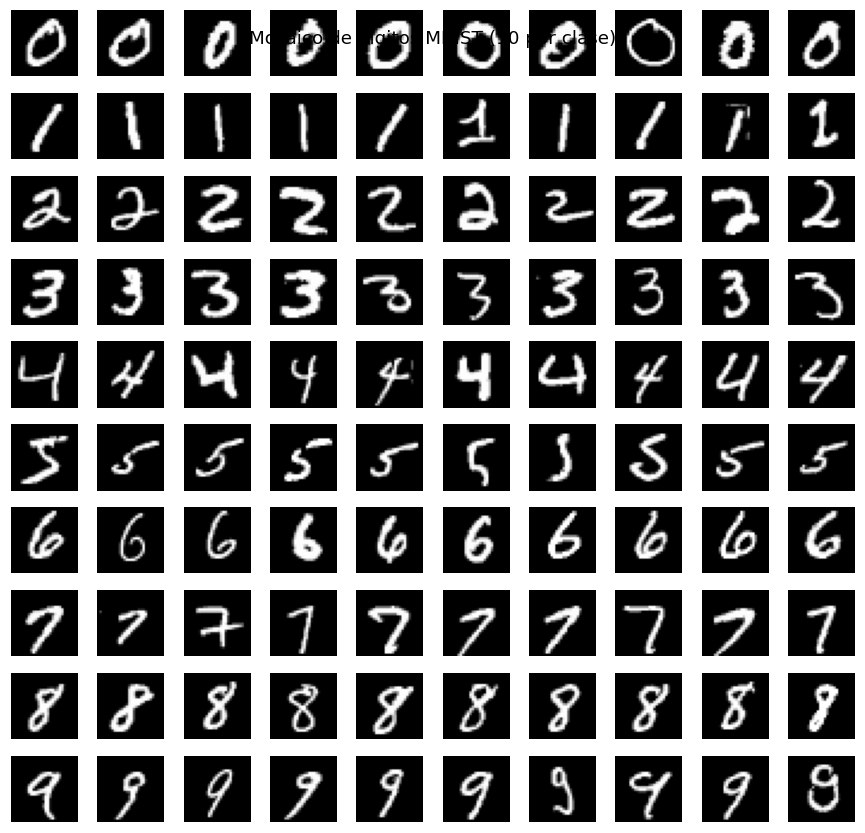

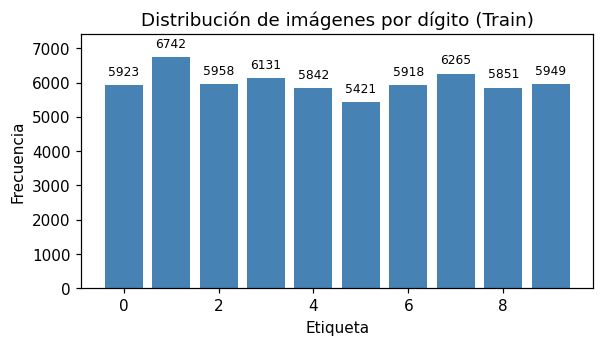

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
plt.rcParams["figure.dpi"] = 110

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Train: {x_train.shape}  Test: {x_test.shape}")

#Mosaico
fig = plt.figure(figsize=(8, 8))
for d in range(10):
    idxs = np.where(y_train == d)[0][:10]
    for j, idx in enumerate(idxs):
        ax = fig.add_subplot(10, 10, d*10 + j + 1)
        ax.imshow(x_train[idx], cmap="gray")
        ax.axis("off")
        if j == 0:
            ax.set_ylabel(d, rotation=0, labelpad=15, fontsize=8, va="center")
fig.suptitle("Mosaico de dígitos MNIST (10 por clase)", y=0.92)
plt.tight_layout()
plt.show()

#Histograma de las clases
labels, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(6,3))
plt.bar(labels, counts, color="steelblue")
plt.title("Distribución de imágenes por dígito (Train)")
plt.xlabel("Etiqueta"); plt.ylabel("Frecuencia")
for x, c in zip(labels, counts):
    plt.text(x, c+200, str(c), ha="center", va="bottom", fontsize=8)
plt.ylim(0, max(counts)*1.1)
plt.show()


Como podemos ver, el mosaico 10 × 10 confirma a simple vista la gran variabilidad intra-clase, el mismo dígito puede escribirse con trazos gruesos o finos, curvos o angulosos. Eso me anticipa que el autoencoder deberá aprender rasgos bastante generales (contornos y topología) para reconstruir bien cualquier estilo manuscrito.

El histograma muestra que todas las etiquetas rondan las 6 000 imágenes (oscilan aprox. ±5 %), de modo que el dataset está prácticamente balanceado. Esto implica que no hace falta aplicar técnicas de re-muestreo ni ponderar la pérdida por clase, bastará con optimizar el error de reconstrucción global.

Por último, los valores de píxel son enteros 0-255. En la siguiente fase los normalizaremos a [0, 1] y añadiremos el canal único para que las entradas queden con forma (28, 28, 1). Así aseguramos entradas homogéneas y estables para el entrenamiento del autoencoder.

#2.Preprocesamiento de los datos

Antes de diseñar el auto-encoder aseguraremos que los tensores de MNIST estén **limpios, correctamente escalados** y con la forma que exigen las capas `Conv2D`.  
Los pasos son:

1. **Carga** del dataset (60 000 train + 10 000 test) desde `tensorflow.keras.datasets`.  
2. **Normalización**: dividir cada píxel por 255 para llevarlo de `[0,255]` a `[0,1]`.  
   *Motivo:* valores pequeños favorecen gradientes estables y permiten usar activaciones estándar sin saturación.  
3. **Reshape**: añadir la dimensión “canal” → `(28, 28, 1)`.  
   *Motivo:* `Conv2D` espera tensores 4-D `(batch, height, width, channels)`.  
4. **Sanity-check** (`NaN`, `Inf`, rango).  
   *Motivo:* cualquier valor no finito hace que la pérdida se vuelva `nan`.  
5. **Estadística global** (media / σ) y **densidad de tinta** (nº de píxeles > 0.1 por imagen).  
   *Motivo:* detectar outliers—imágenes casi vacías o saturadas—y decidir si las eliminamos.  
6. **No dividimos** aún en train/val: el *split* estratificado se define en el **punto 3** junto al protocolo experimental.  

NaN: 0  | Inf: 0
Min–Max: 0.0 1.0
Media global: 0.1307  |  Desv. std.: 0.3081
Imágenes con <20 píxeles activos: 0


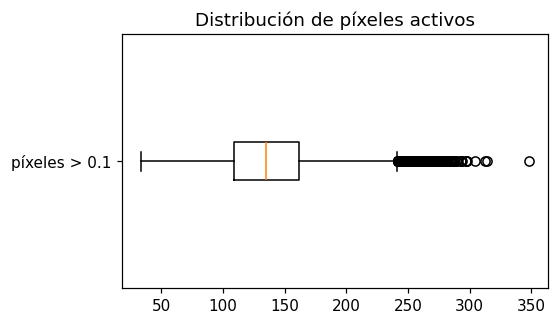

In [37]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.expand_dims(x_train.astype("float32") / 255.0, -1)
x_test  = np.expand_dims(x_test.astype ("float32") / 255.0, -1)

print("NaN:", np.isnan(x_train).sum(), " | Inf:", np.isinf(x_train).sum())
print("Min–Max:", x_train.min(), x_train.max())

print(f"Media global: {x_train.mean():.4f}  |  Desv. std.: {x_train.std():.4f}")

active = (x_train > 0.1).sum(axis=(1,2,3))
few_idx = np.where(active < 20)[0]
print("Imágenes con <20 píxeles activos:", len(few_idx))

plt.figure(figsize=(5,3))
plt.boxplot(active, vert=False, tick_labels=["píxeles > 0.1"])
plt.title("Distribución de píxeles activos"); plt.show()

Los resultados confirman que los tensores están limpios y correctamente normalizados:

* NaN / Inf: 0 ⇒ ningún valor inválido que pudiera romper el entrenamiento.

* Rango 0–1 tras la división /255: verificado.

* Media ≈ 0.131 y σ ≈ 0.308, indican que la mayor parte de la imagen sigue siendo fondo, sólo una fracción minoritaria contiene trazos blancos, lo esperable en MNIST.

* Densidad de tinta (box-plot): el 50 % central de las imágenes tiene entre 110 y 170 píxeles “activos” (> 0.1). No aparecen ejemplos casi vacíos (0 imágenes con < 20 píxeles) ni saturados. Los pocos outliers a la derecha (≈ 300–350 píxeles) corresponden a dígitos gruesos o escritos con trazo muy ancho.

En conjunto, no es necesario que filtre ni re-muestree, ya que las 60 000 imágenes pueden pasar tal cual a la fase siguiente.

#3. Protocolo de validación experimental y métricas

A la hora de evaluar nuestro auto-encoder conviene fijar de antemano un circuito de datos y una métrica que eviten fugas de información y nos sirvan para comparar variantes de forma objetiva. Voy a partir de los 60 000 ejemplos originales reservados por MNIST para entrenamiento y, pese a que el modelo no utiliza las etiquetas durante la optimización, haré una partición estratificada de esas etiquetas de modo que queden 50 000 imágenes para aprendizaje efectivo y 10 000 para validación temprana, así la fracción de cada dígito es idéntica en ambos subconjuntos y cualquier cifra de error de validación resulta representativa del comportamiento global. El bloque de 10 000 imágenes de TEST que acompaña a MNIST lo dejo sin tocar hasta el final, garantizando una estimación honesta sobre datos nunca vistos. Como función de pérdida (y métrica de referencia) emplearé el error cuadrático medio por píxel,
$$
\text{MSE} = \frac{1}{784}\sum_{i=1}^{28}\sum_{j=1}^{28}(x_{ij}-\hat{x}_{ij})^{2}
$$
 , porque se interpreta directamente en la misma escala
[0,1] de los píxeles normalizados.

Otras métricas (binary-cross-entropy, SSIM) son válidas pero no aportan claridad adicional en un primer experimento. Para evitar sobre-entrenar activaré un early-stopping que vigile la MSE de validación y detenga el aprendizaje si no mejora en cinco épocas consecutivas, guardando además los pesos con mejor rendimiento mediante un ModelCheckpoint. Todo el proceso seguirá la configuración exigida por el enunciado, 50 épocas máximas y batch_size = 1000. Con ello dispondré de una única cifra (MSE-val) para comparar modelos sin mirar el test hasta el cierre del proyecto.

In [1]:
# Split estratificado TRAIN / VALID y visualización rápida
from sklearn.model_selection import train_test_split
from collections import Counter

# x_train, y_train provienen del preprocesado (sección 2)
x_train_ae, x_val_ae, y_train_ae, y_val_ae = train_test_split(
    x_train, y_train, test_size=10_000, stratify=y_train, random_state=42
)

# --- barras comparativas de la distribución de dígitos -----------------
labels = np.arange(10)
train_counts = np.array([Counter(y_train_ae)[d] for d in labels])
val_counts   = np.array([Counter(y_val_ae)[d]   for d in labels])

plt.figure(figsize=(6,3))
plt.bar(labels-0.15, train_counts, width=0.3, label="Train 50 k")
plt.bar(labels+0.15, val_counts,   width=0.3, label="Valid 10 k")
plt.title("Proporción de dígitos tras el split estratificado")
plt.xlabel("Etiqueta"); plt.ylabel("Nº imágenes"); plt.legend()
for d, c in zip(labels, train_counts):
    plt.text(d-0.15, c+150, str(c), ha="center", va="bottom", fontsize=7)
for d, c in zip(labels, val_counts):
    plt.text(d+0.15, c+60,  str(c), ha="center", va="bottom", fontsize=7)
plt.ylim(0, train_counts.max()*1.12)
plt.tight_layout(); plt.show()

# --- MSE de referencia: reconstrucción "todo negro" --------------------
mse_zero = ((x_val_ae - 0.0)**2).mean()
print(f"MSE base si el modelo devolviese una imagen negra: {mse_zero:.5f}")


KeyboardInterrupt: 